STA 221: Homework 1 |
Erica Scaduto |
Due: May 1, 2020

<b> PART 1: Basics (6 points). </b> Answer true or false for each of the question below and give justiﬁcation: 

<b>(a) A rectangular matrix of size n×m is a linear transformation. True</b>

The purpose of a matrix is a linear transformation of two vectors. 
Suppose we have a matrix A ∈ ℝ <sup>m×n</sup> and vectors x (in m dimensional space) and y (in n dimensional space). 
If you let matrix A operate on the summation of scalar multiplication of vector x and y, this would be equal to having the matrix operate on each of the vectors separately, which is a linear tranformation. In other words, if A is an m × n matrix and x ∈ ℝ<sup>m</sup>, then f(x) = Ax is a linear transformation.

A (&alpha;x + &beta;y) = &alpha;A (x) + &beta;A (y) 


<b> (b) Only square matrices have Eigenvalue decompositions.  True </b>

The definition of Eigenvalue decomposition: <b>𝐴𝑣=𝜆𝑣</b> can only be applied to square matrixes A ∈ ℝ <sup>nxn</sup>. 

For example, if we were to have a non-square matrix A ∈ ℝ <sup>mxn</sup> 
<br>
𝐴:ℝ<sup>m</sup>→ℝ<sup>n</sup> then it will not satisfy the linear equation 𝐴𝑣∉ℝ𝑚 

For data structures with non-square matrices, we would use Singular Value Decomposition (SVD), by creating two unitary matrices (U, V) with orthogonal columns and a diagonal matrix (Σ) where σ<sub>n</sub> are non-negative real numbers. 

<b> (c) Power Method can be used to ﬁnd only eigenvectors (and not singular vectors). False</b>

The Power Method is an iterative method that gives the maximum eigenvector and its corresponding eigenvalue. However, it can also be used to find singular vectors for U and V matrix by performing the power method for each separately. To find the right singular vectors (v<sub>j</sub>) it would be the eigenvectors of A<sup>T</sup> A. While the left singular vectors (u<sub>j</sub>) are the eigenvectors of A A<sup>T</sup>. 

Proofs can be found <a href="http://danielkhashabi.com/learn/svd.pdf">here</a> and <a href="https://www.cs.princeton.edu/courses/archive/fall18/cos521/Lectures/lec14.pdf"> here</a>. 

<b> (d) Singular vectors are orthogonal to each other. True</b>

The Singular Value Decomposition of a non-square matrix A ∈ ℝ <sup>mxn</sup> is U Σ V<sup>T</sup> where U is a mxm matrix, V is a nxn matrix, and Σ is a mxn diagonal matrix, which aims to generalize the eigenvalue decomposition of a square matrix. The columns of V are the right singular vectors of matrix A, forming an orthogonal set. While the columns of U are the left singular vectors of matrix A, also forming an orthogonal set. 

Proofs can be found <a href="https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf">here</a>. 

<b> (e) Kernel PCA is a linear dimension reduction technique. False</b>

Kernel PCA is an extension of the linear PCA method, which is considered a dimension reduction technique, but is used when N data points cannot be linearly separated in the original 2D space, applying what is known as a 'kernel trick'. In essence, the feature map (&phi;) embeds the same vector into a higher dimensional space (i.e. 2D to 3D), after which the data points are separated by a hyperplane, analogous to a linear separation. Each unique kernel has an associated &phi; where: K(x,z)=&phi;(x)T&phi;(z)


<b> (f) Spectral Clustering is a non-linear dimension reduction technique. False</b>

A dimension reduction method (removing irrelavant noise and complexity) can be applied to the dataset to improve the performance of clustering. However, since the main objective of Spectral Clustering is to assign the nodes into k clusters, in and of itself is not considered a dimension reduction technique. Although, the Laplacian (L) matrix is used to construct a low-dimensional embedding. 

Overall, this method uses graph cuts for non-linear data separation where data points are vertices (V) connected to neighboring points with corresponding edge (E) weights (W) to designate the similarity (i.e. G = (V,E,W). The weights are used to associate certain costs when 'cutting' the edges, since higher similarity (closeness in value/distance) within the data cloud should be preserved as to create the groups. The similarity or affinity matrix can be determined by gaussian kernerl, adjacency, or k-nearest neighbor.

<b>PART 2: Python practice via statistical concepts (10 points). </b> This questions helps you brushup your numerical computing skills in python by implementing some basic statistics concepts. Let X be a random variable that takes values +1,−1 with equal probability. <br><br><center>P(X = +1) = P(X = −1) = 1/2</center>

Generate N = 10,000 datasets, each of which has n data points. For this simulation, we consider n = {10,100,1000,10000}. (Hint: Write a function that samples from the uniform distribution between 0 and 1. If the result is less than 0.5, set it to -1. Otherwise, set it to 1).


In [339]:
# Generate dataset 
from numpy import mean
#from numpy.random import seed
#seed(20) 

def GenerateDataset(nList, N):
    fullData = []
    for i in range(1, N + 1): #Generate N = 10,000 datasets
        data = []
        for n in nList: # each with n data points where n = {10,100,1000,10000}
            uniDist = np.random.uniform(0, 1 , n) # uniform distribution between 0 and 1
            values = np.where(uniDist < 0.5, -1, 1)  # If the result is less than 0.5, set it to -1. Otherwise, set it to 1
            X_Mean = mean(values)
            data.append(X_Mean)
        fullData.append(data)
    return fullData

nList = [10,100,1000,10000]
N = 10000
sample = GenerateDataset(nList,  N)

Let X (i) n be the sample average of ith dataset, µ = E(X) = 0 and σ2 = Var(X) = 1. (Hint: Once you compute the sample averages, you will not need the individual data points from each dataset. Therefore, to save memory, you need only store the X (i) n rather than all the data points. It is highly recommended that you do this to avoid freezing or crashing your computer). Plot and intepret the following:

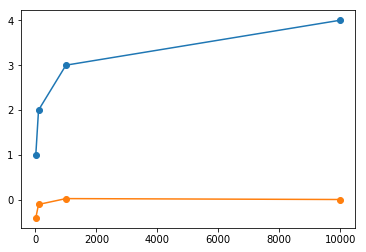

In [340]:
nList = [10,100,1000,10000]
log10 = np.log10(nList)

plt.plot(nList, log10,'-o')
plt.plot(nList, sample[0],'-o')

 Draw log10(n) v.s. 1 NPN i=1 1I{|X
(i) n −µ| > } for  = 0.5, = 0.1, = 0.05; (Hint 1: This plot illustrates the convergence of empirical averages to true expectation.) (Hint 2: For some statement S, the indicator function 1I{S} is deﬁned as 1I{S} = 1 if S is true and 1I{S} = 0 otherwise.) 

In [341]:
#[[[1 if abs(sample[i][n]) > e else 0 for e in [0.5, 0.1, 0.05]] for i, row in enumerate(sample)] for n in range(0,4)]
N = len(sample)
eList = [0.5, 0.1, 0.05]
nList = [10,100,1000,10000]

eValues = []
sumValues = [] 
nValues = []

# def convergence(e):
for n, nVal in enumerate(nList):
    for e, eVal in enumerate(eList):
        values = []
        for i, row in enumerate(sample):
            values.append(np.where(abs(sample[i][n]) > e, 1, 0))
        val = sum(values) / N
        sumValues.append(val)
        nValues.append(nVal)
        eValues.append(eVal)
        
dict = {'eValues': eValues, 'sumValues': sumValues, 'nValues': nValues}  
    
df = pd.DataFrame(dict) 
df

,eValues,sumValues,nValues
0,0.50,0.7523,10
1,0.10,0.0000,10
2,0.05,0.0000,10
3,0.50,0.9182,100
4,0.10,0.0000,100
5,0.05,0.0000,100
6,0.50,0.9748,1000
7,0.10,0.0000,1000
8,0.05,0.0000,1000
9,0.50,0.9919,10000


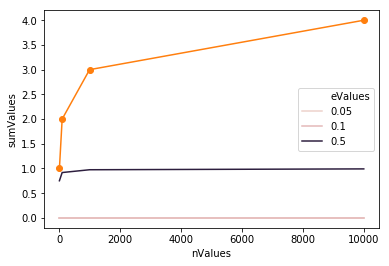

In [342]:
sns.lineplot(x="nValues", y="sumValues", hue="eValues",
                     data=df, legend="full")

plt.plot(nList, np.log10(nList),'-o')

Draw histograms of √n(X(i) n −µ)/σ for N datsets for n = 10,n = 1,000,n = 10,000. You may choose your histogram bins or you may let Python choose automatically–any meaningful plot will do. (Hint: This plot illustrates the Central Limit Theorem.)

In [356]:
nValues = []
values = []
# def convergence(e):
for n, nVal in enumerate(nList):
    for i, row in enumerate(sample):
        values.append((np.sqrt(nVal)*sample[i][n])/np.sqrt(1))
        nValues.append(nVal)
dict = {'Values': values, 'n': nValues} 
df = pd.DataFrame(dict) 

C:\Users\erica\AppData\Local\ESRI\conda\envs\my_arcgispro-py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


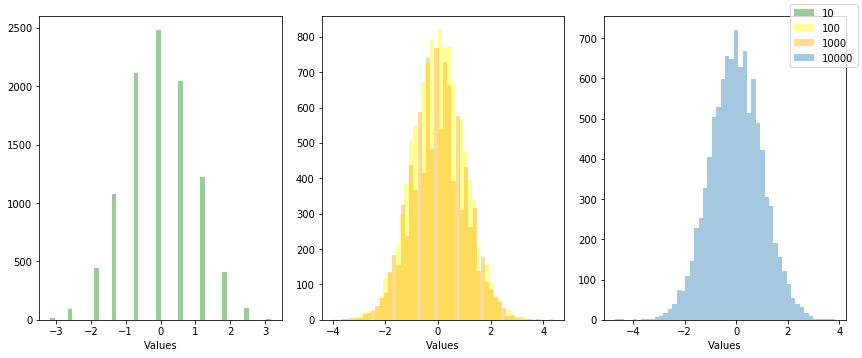

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3, figsize=(12,5))

df10 = df[df.n == 10]
sns.distplot(df10['Values'],  color='green', kde=False, label='10', ax=axs[0])

df100 = df[df.n == 100]
sns.distplot(df100['Values'],  color='yellow', kde=False, label='100', ax=axs[1])

df1000 = df[df.n == 1000]
sns.distplot(df1000['Values'],  color='orange', kde=False, label='1000', ax=axs[1])

df10000 = df[df.n == 10000]
sns.distplot(df10000['Values'],  kde=False, label='10000', ax=axs[2])

fig.legend()
fig.tight_layout()

<b>Part 3: Amazon Review Analysis (14 points) </b> In this question, we will take the raw reviews from Amazon and go through several steps to extract Document-Term matrix and TF-IDF matrix representation of the documents (each review is deﬁned as a document). This process will result in a matrix of size number of documents x number of words in our dictionary considered. After this, we will try out diﬀerent dimension reduction techniques on this dataset.

(a) The dataset Amazon.RData consists of real reviews of diﬀerent products in Amazon. Unfortunately, it is provided to you in Rdata format (the preferred data format for R programming language). This scenario is quite common in practice. To process this data, you need to load the data in python. In order to proceed, install pyreadr package in Python. Note: to install with pip, use pip install pyreadr. You are welcome to explore any other ways of importing this data into Python. After loading the data, you will use only the review ﬁeld in this question.

In [1]:
# conda install pyreadr 
import pyreadr
amazonData = pyreadr.read_r('Amazon.rdata')

In [337]:
print(amazonData.keys()) 
df1 = amazonData['dat']
df1['review']

odict_keys(['dat'])


0       My husband and I selected the Diaper "Champ" m...
1       I have had a diaper genie for almost 4 years s...
2       We loved this pail at first. The mechanism see...
3       Bad construction is my main issue. My husband ...
4       Diaper catches and jams in the well and that i...
                              ...                        
1307    Got this for a gift, not too expensive and the...
1308    Our previous Sony monitor\'s speaker unit was ...
1309    Don\'t waste your money on cheaper models. The...
1310    I bought this monitor for my third child.  I h...
1311    I went ahead and purchased the Sony Baby Call ...
Name: review, Length: 1312, dtype: category
Categories (1307, object): [, "Sophie the Giraffe" has tested positive for p..., "This gate expands from 29 to 52".  This is to..., (This is a long review, but if you read the wh..., ..., we are constantly having troubles with getting..., we bought it from amazon and had used it for o..., we bought this swing thinkin

(b) The next pre-processing step we consider is called as stemming. This process ﬁxes the words in our dictionary. For example, some common words (like ‘the’, ‘and’) are ignored, numbers are ignored, the ’root’ of the word is used (i.e., running, ran are all treated as a single word run). 
Note that above we used FrenchStemmer. Feel free to explore other options depending on the actual text you see. 

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.stem.snowball import EnglishStemmer 
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")
analyzer = CountVectorizer().build_analyzer() 
def stemmed_words(doc): 
    return (stemmer.stem(w) for w in analyzer(doc))
output = stemmed_words(df1.to_string())

(c) Now we will extract the Document-Term matrix of this dataset.This will help build a matrix where each row represents one document and each column represents a different word. To do so, use the command CountVectorizer. For the analyzer, use stemmed words option. This will give you a matrix which corresponds term counts in each document. 

In [4]:
stem_vectorizer = CountVectorizer(analyzer=stemmed_words)
DocTerm = stem_vectorizer.fit_transform(df1['review'])
DocTermMatrix = DocTerm.toarray()
# stem_vectorizer.vocabulary_.get('gift')
print(len(DocTermMatrix), len(df1['review']))

1312 1312


(d) Next, we will extract the TF-IDF matrix of this dataset. To do so, use the command TfidfVectorizer with the option token pattern=‘[a-z]{3,15}’. This will give you an alternate representation of the same dataset. 

In [5]:
#TF-IDF matrix  
vectorizer = TfidfVectorizer(token_pattern='[a-z]{3,15}') # initiate TF-IDF vectorizer w/ token pattern 
Tfid = vectorizer.fit_transform(df1['review']) 
TfidMatrix = Tfid.toarray()

print(len(TfidMatrix), len(df1['review']))

1312 1312


(e) How many rating values are present in the dataset ? How many reviews of each rating value are there in the entire dataset? You can think of the dataset as having roughly as many clusters as the number of rating values. 

In [6]:
print("Total # of reviews: ", len(df1['rating']))
print("Number of unique rating values: ", len(df1['rating'].unique()))
print("There are {} number of reviews with rating value of '1'".format(str(len(df1[df1['rating'] == 1]))))
print("There are {} number of reviews with rating value of '5'".format(str(len(df1[df1['rating'] == 5]))))

Total # of reviews:  1312
Number of unique rating values:  2
There are 656 number of reviews with rating value of '1'
There are 656 number of reviews with rating value of '5'


(f) Perform, (i) PCA and (ii) kernel PCA on both Document-Term representation and TF-IDF representation, all with number of components being set to 2. Note that, you might have to set other parameters as well for some of the above methods – you are welcome to explore diﬀerent options. Produce the best ﬁgure (for each of the above method) that identiﬁes the cluster structure (if it can) after dimension reduction (to 2 dimensions).

In [150]:
# (i) PCA Document Term Representation 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# set up linear PCA 
pca = PCA(n_components=2)
DocTermPCA = pca.fit_transform(DocTermMatrix)
DocTermPCADf = pd.DataFrame(data = DocTermPCA, columns = ['Linear_PC1', 'Linear_PC2'])

In [286]:
# (ii) Kernel PCA Document Term Representation 
# set up kernel PCA 
kpca = KernelPCA(n_components=2,kernel='rbf') ## NOTE: 2 components
DocTermkernPCA = kpca.fit_transform(DocTermMatrix)
DocTermKPCADf = pd.DataFrame(data = DocTermkernPCA, columns = ['Kernel_PC1', 'Kernel_PC2'])

In [287]:
# merge results together with corresponding rating values 
DocTermPCAfinalDf = pd.concat([DocTermPCADf, DocTermKPCADf, df1[['rating']]], axis = 1)

In [277]:
# (i) PCA Tfid 
pca = PCA(n_components=2)
TfidPCA = pca.fit_transform(TfidMatrix)
TfidPCADf = pd.DataFrame(data = TfidPCA, columns = ['Linear_PC1', 'Linear_PC2'])

In [289]:
# (ii) Kernel PCA Document Term Representation 
# set up kernel PCA 
kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma = 50) ## NOTE: 2 components
TfidkernPCA = kpca.fit_transform(TfidMatrix)
TfidkernPCADf = pd.DataFrame(data = TfidkernPCA, columns = ['Kernel_PC1', 'Kernel_PC2'])

In [290]:
# merge results together with corresponding rating values 
TfidFinalDf = pd.concat([TfidPCADf, TfidkernPCADf, df1[['rating']]], axis = 1)

,Linear_PC1,Linear_PC2,Kernel_PC1,Kernel_PC2,rating
0,-0.174513,0.056805,-0.050809,0.016118,1
1,-0.177996,0.039061,-0.051799,-0.007956,1
2,-0.009569,0.088431,0.004585,0.001412,1
3,-0.088808,-0.043183,-0.150371,0.020449,1
4,-0.066769,-0.055776,-0.054336,0.103269,1
...,...,...,...,...,...
1307,-0.098856,0.035584,-0.017285,-0.024980,5
1308,-0.139183,0.035910,-0.097742,0.086219,5
1309,-0.147730,0.033205,-0.073297,-0.008467,5
1310,-0.227791,0.189287,-0.033231,0.015448,5


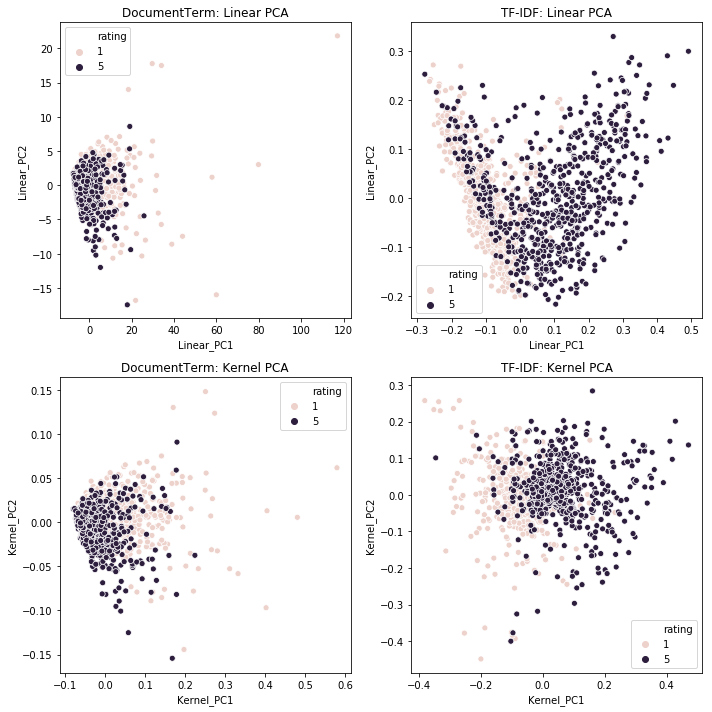

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

sns.scatterplot(x="Linear_PC1", y="Linear_PC2", hue="rating",
                     data=DocTermPCAfinalDf, ax=axs[0][0], legend="full")

sns.scatterplot(x="Linear_PC1", y="Linear_PC2", hue="rating",
                     data=TfidFinalDf, ax=axs[0][1], legend="full")

sns.scatterplot(x="Kernel_PC1", y="Kernel_PC2", hue="rating",
                     data=DocTermPCAfinalDf, ax=axs[1][0], legend="full")

sns.scatterplot(x="Kernel_PC1", y="Kernel_PC2", hue="rating",
                     data=TfidFinalDf, ax=axs[1][1], legend="full")

axs[0][1].title.set_text('TF-IDF: Linear PCA')
axs[0][0].title.set_text('DocumentTerm: Linear PCA')
axs[1][1].title.set_text('TF-IDF: Kernel PCA')
axs[1][0].title.set_text('DocumentTerm: Kernel PCA')

fig.tight_layout()

(g) Now, perform (i) k-means clustering and (ii) spectral clustering on both DocumentTerm representation and TF-IDF representation of the data. Is the cluster assignment you obtained, consistent with the true rating of each document ?


In [234]:
from sklearn.cluster import KMeans
import numpy as np
#(i) k-means clustering
    
def kmeansFunction(n, pcatype, pcaResults, finalDF, x, y):
    Kmean = KMeans(n_clusters= n)
    Kmean.fit(pcaResults)
    X = [list(a) for a in zip(x, y)]
    ypred = Kmean.predict(X) 
    centerVal = Kmean.cluster_centers_
    finalDF[pcatype] = ypred
    return centerVal

In [319]:
# k-means on linear pca for DocTerm and TFID matrices 
DocTermCenterPCA = kmeansFunction(2, 'pca', DocTermkernPCA, DocTermPCAfinalDf, DocTermPCAfinalDf['Linear_PC1'], DocTermPCAfinalDf['Linear_PC2'])
TfidCenterPCA = kmeansFunction(2, 'pca', TfidPCA, TfidFinalDf, TfidFinalDf['Linear_PC1'], TfidFinalDf['Linear_PC2'])

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt

def makeSubPlots(x, y, df1, df2, hueObs, huePred): #center1, center2

    fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(10,10))

    # Hue is actual observed ratings 
    sns.scatterplot(x=x, y=y, hue=hueObs,
                         data=df1,ax=axs[0][0], legend="full")

    # Hue is predicted rating value via kmeans with pca dimension reduction 
    sns.scatterplot(x=x, y=y, hue=huePred,
                         data=df1, ax=axs[0][1], legend="full")
    # plot center 
    #sns.scatterplot(x=center1[:,0], y=center1[:,1], color=".2", s=100, ax=axs[0][1])

    # Hue is actual observed ratings 
    sns.scatterplot(x=x, y=y, hue=hueObs,
                         data=df2,ax=axs[1][0], legend="full")

    # Hue is predicted rating value via kmeans with pca dimension reduction 
    sns.scatterplot(x=x, y=y, hue=huePred,
                         data=df2, ax=axs[1][1], legend="full")
    # plot center 
    #sns.scatterplot(x=center2[:,0], y=center2[:,1], color=".2", s=100, ax=axs[1][1])

    axs[0][1].title.set_text('DocumentTerm: PREDICTED')
    axs[0][0].title.set_text('DocumentTerm: OBSERVED')
    axs[1][1].title.set_text('TF-IDF: PREDICTED')
    axs[1][0].title.set_text('TF-IDF: OBSERVED')

    fig.tight_layout()             

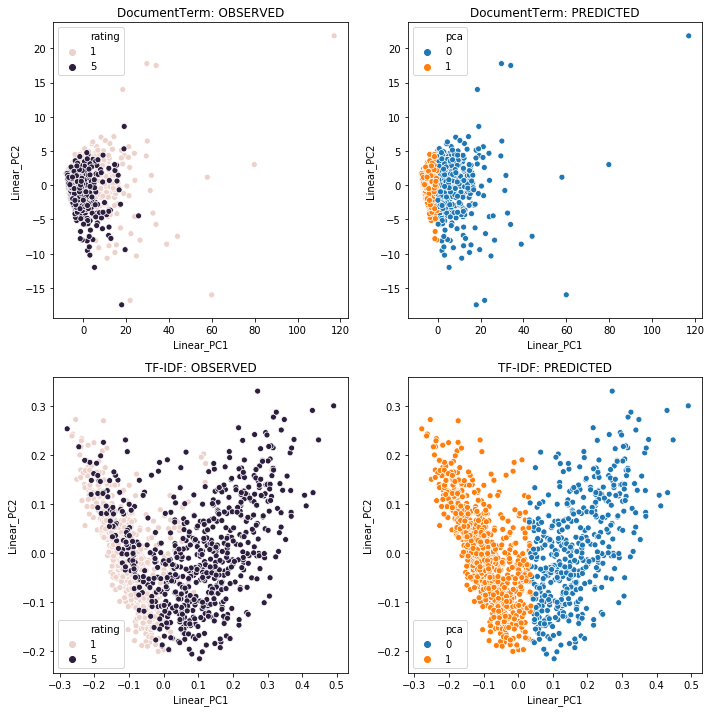

In [329]:
makeSubPlots('Linear_PC1', 'Linear_PC2', DocTermPCAfinalDf, TfidFinalDf, 'rating', 'pca')    

In [330]:
# k-means on kernel pca for DocTerm and TFID matrices 
DocTermCenterKPCA = kmeansFunction(2, 'kernel_pca', DocTermkernPCA, DocTermPCAfinalDf, DocTermPCAfinalDf['Kernel_PC1'], DocTermPCAfinalDf['Kernel_PC2'])
TfidCenterKPCA = kmeansFunction(2, 'kernel_pca', TfidPCA, TfidFinalDf, TfidFinalDf['Kernel_PC1'], TfidFinalDf['Kernel_PC2'])

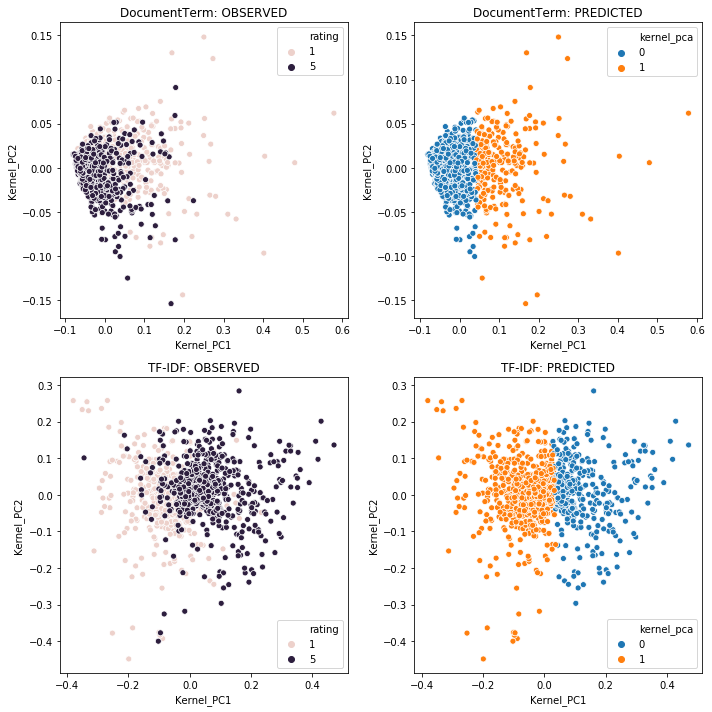

In [331]:
makeSubPlots('Kernel_PC1', 'Kernel_PC2', DocTermPCAfinalDf, TfidFinalDf, 'rating', 'kernel_pca') 

In [310]:
from sklearn.cluster import SpectralClustering

#(ii) spectral clustering
    
def spectralClustering(n, pcatype, pcaResults, finalDF, x, y):
    model = SpectralClustering(n_clusters= n, affinity='nearest_neighbors', assign_labels='kmeans')
    X = [list(a) for a in zip(x, y)]
    ypred = model.fit_predict(X)
    finalDF[pcatype] = ypred
    return None

In [332]:
spectralClustering(2, 'Spec_LPCA', DocTermkernPCA, DocTermPCAfinalDf, DocTermPCAfinalDf['Linear_PC1'], DocTermPCAfinalDf['Linear_PC2'])
spectralClustering(2, 'Spec_LPCA', TfidPCA, TfidFinalDf, TfidFinalDf['Linear_PC1'], TfidFinalDf['Linear_PC2'])

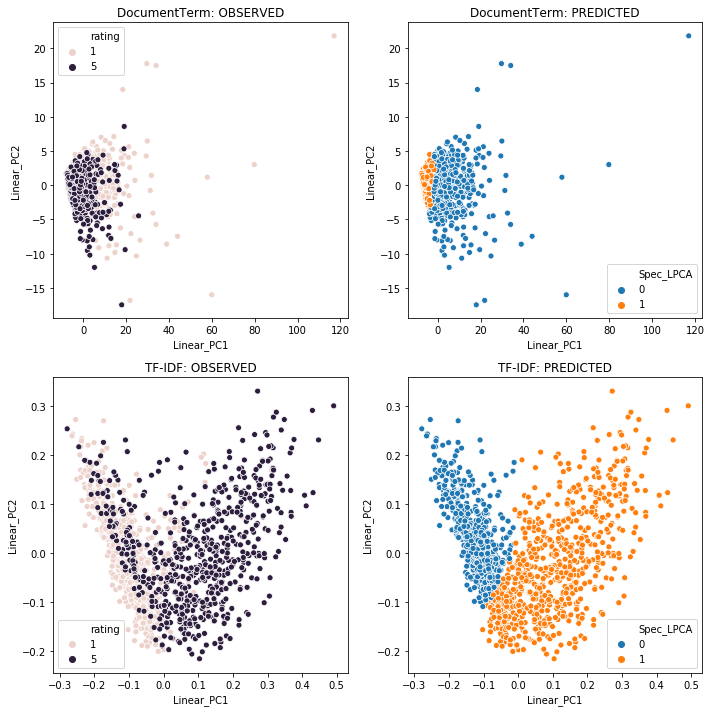

In [333]:
makeSubPlots('Linear_PC1', 'Linear_PC2', DocTermPCAfinalDf, TfidFinalDf, 'rating', 'Spec_LPCA') 

In [334]:
spectralClustering(2, 'Spec_KPCA', DocTermkernPCA, DocTermPCAfinalDf, DocTermPCAfinalDf['Kernel_PC1'], DocTermPCAfinalDf['Kernel_PC2'])
spectralClustering(2, 'Spec_KPCA', TfidPCA, TfidFinalDf, TfidFinalDf['Kernel_PC1'], TfidFinalDf['Kernel_PC2'])

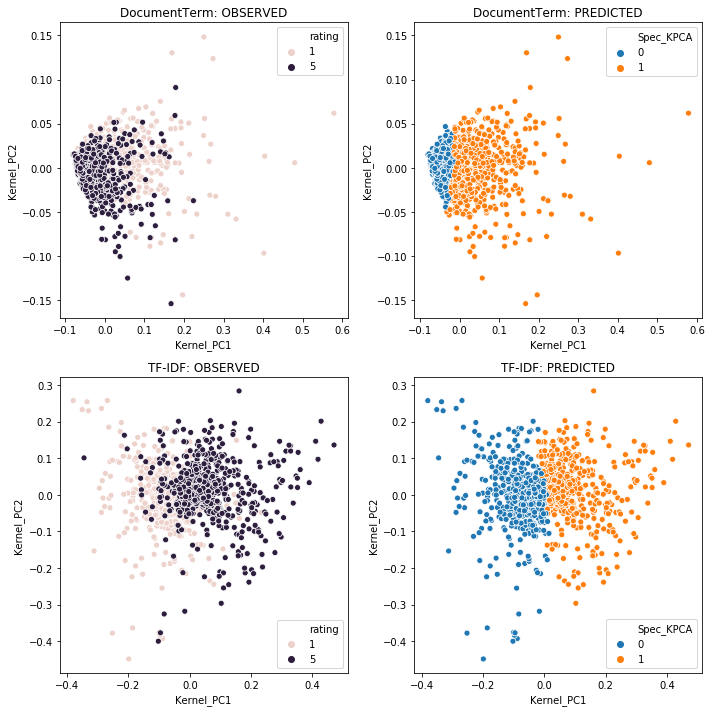

In [335]:
makeSubPlots('Kernel_PC1', 'Kernel_PC2', DocTermPCAfinalDf, TfidFinalDf, 'rating', 'Spec_KPCA') 

<b>Pledge:</b> Please include the following pledge and sign it before you submit your assignment in canvas. If you can not honestly check each of these responses, please email me at kbala@ucdavis.edu to explain your situation. 
<br>
• We pledge that we are honest students with academic integrity and we have not cheated on this homework. 
<br>
• These answers are our own work. 
<br>
• We did not give any other students assistance on this homework. 
<br>
• We understand that to submit work that is not our own and pretend that it is our is a violation of the UC Davis code of conduct and will be reported to Student Judicial Aﬀairs. 
<br>
• We understand that suspected misconduct on this homework will be reported to the Oﬃce of Student Support and Judicial Aﬀairs and, if established, will result in disciplinary sanctions up through Dismissal from the University and a grade penalty up to a grade of “F” for the course.
<br>
Team Member 1 : Erica Scaduto